In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/adwords dataset.xlsx')

In [3]:
df.head()

,Title,Keyword,Position,Previous position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Trends,Last Seen,Keyword Difficulty
0,PMP® Exam & Certification | Flat 40% Off - Enr...,PMP certification,1,1,90500,3.76,4253,22.77,15991,24.66,0.60,166000000,"[67,54,81,81,67,67,81,67,81,81,67,67]",2024-12-31,78
1,PMP® Exam & Certification | Confidently Ace Th...,PMP certification,1,1,90500,3.76,4253,22.77,15991,24.66,0.60,172000000,"[67,54,81,81,67,67,81,67,81,81,67,67]",2025-01-01,78
2,PMP® Training & Exam | Special Offer: Get $400...,PMP certification,1,2,90500,3.82,1176,6.29,4492,6.92,0.65,154000000,"[54,81,81,67,67,81,67,81,81,67,67,81]",2025-01-14,77
3,CSM Scrum Master Course Online | Today's Offer...,scrum master certification,1,1,18100,3.21,850,4.55,2728,4.20,0.64,32000000,"[44,54,54,44,44,44,54,54,44,54,44,44]",2025-01-10,70
4,PMP® Certification | Ace PMP Exam in 1st Attempt,PMP certification,3,3,90500,3.82,814,4.35,3109,4.79,0.65,165000000,"[54,81,81,67,67,81,67,81,81,67,67,81]",2025-01-07,78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               199 non-null    object        
 1   Keyword             199 non-null    object        
 2   Position            199 non-null    int64         
 3   Previous position   199 non-null    int64         
 4   Search Volume       199 non-null    int64         
 5   CPC                 199 non-null    float64       
 6   Traffic             199 non-null    int64         
 7   Traffic (%)         199 non-null    float64       
 8   Traffic Cost        199 non-null    int64         
 9   Traffic Cost (%)    199 non-null    float64       
 10  Competition         199 non-null    float64       
 11  Number of Results   199 non-null    int64         
 12  Trends              199 non-null    object        
 13  Last Seen           199 non-null    datetime64[ns]

In [5]:
df.describe()

,Position,Previous position,Search Volume,CPC,Traffic,Traffic (%),Traffic Cost,Traffic Cost (%),Competition,Number of Results,Last Seen,Keyword Difficulty
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,1.990000e+02,199,199.000000
mean,2.532663,2.391960,4711.608040,3.916985,93.829146,0.498945,325.819095,0.499347,0.381658,4.575325e+07,2025-01-11 20:15:40.703517696,48.743719
min,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2024-12-27 00:00:00,8.000000
25%,1.000000,1.000000,70.000000,2.310000,0.500000,0.000000,0.000000,0.000000,0.185000,2.750000e+06,2025-01-01 00:00:00,37.000000
50%,2.000000,2.000000,170.000000,3.210000,3.000000,0.010000,7.000000,0.010000,0.410000,5.570000e+06,2025-01-13 00:00:00,48.000000
75%,4.000000,4.000000,1600.000000,4.485000,20.000000,0.100000,48.000000,0.070000,0.520000,3.170000e+07,2025-01-22 00:00:00,60.000000
max,6.000000,6.000000,90500.000000,46.860000,4253.000000,22.770000,15991.000000,24.660000,0.950000,1.400000e+09,2025-01-26 00:00:00,97.000000
std,1.526761,1.559311,16003.015228,3.853916,446.718734,2.392012,1671.621365,2.578053,0.198629,1.462253e+08,NaN,16.911524


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop('Trends' , axis = 1 , inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               199 non-null    object        
 1   Keyword             199 non-null    object        
 2   Position            199 non-null    int64         
 3   Previous position   199 non-null    int64         
 4   Search Volume       199 non-null    int64         
 5   CPC                 199 non-null    float64       
 6   Traffic             199 non-null    int64         
 7   Traffic (%)         199 non-null    float64       
 8   Traffic Cost        199 non-null    int64         
 9   Traffic Cost (%)    199 non-null    float64       
 10  Competition         199 non-null    float64       
 11  Number of Results   199 non-null    int64         
 12  Last Seen           199 non-null    datetime64[ns]
 13  Keyword Difficulty  199 non-null    int64         

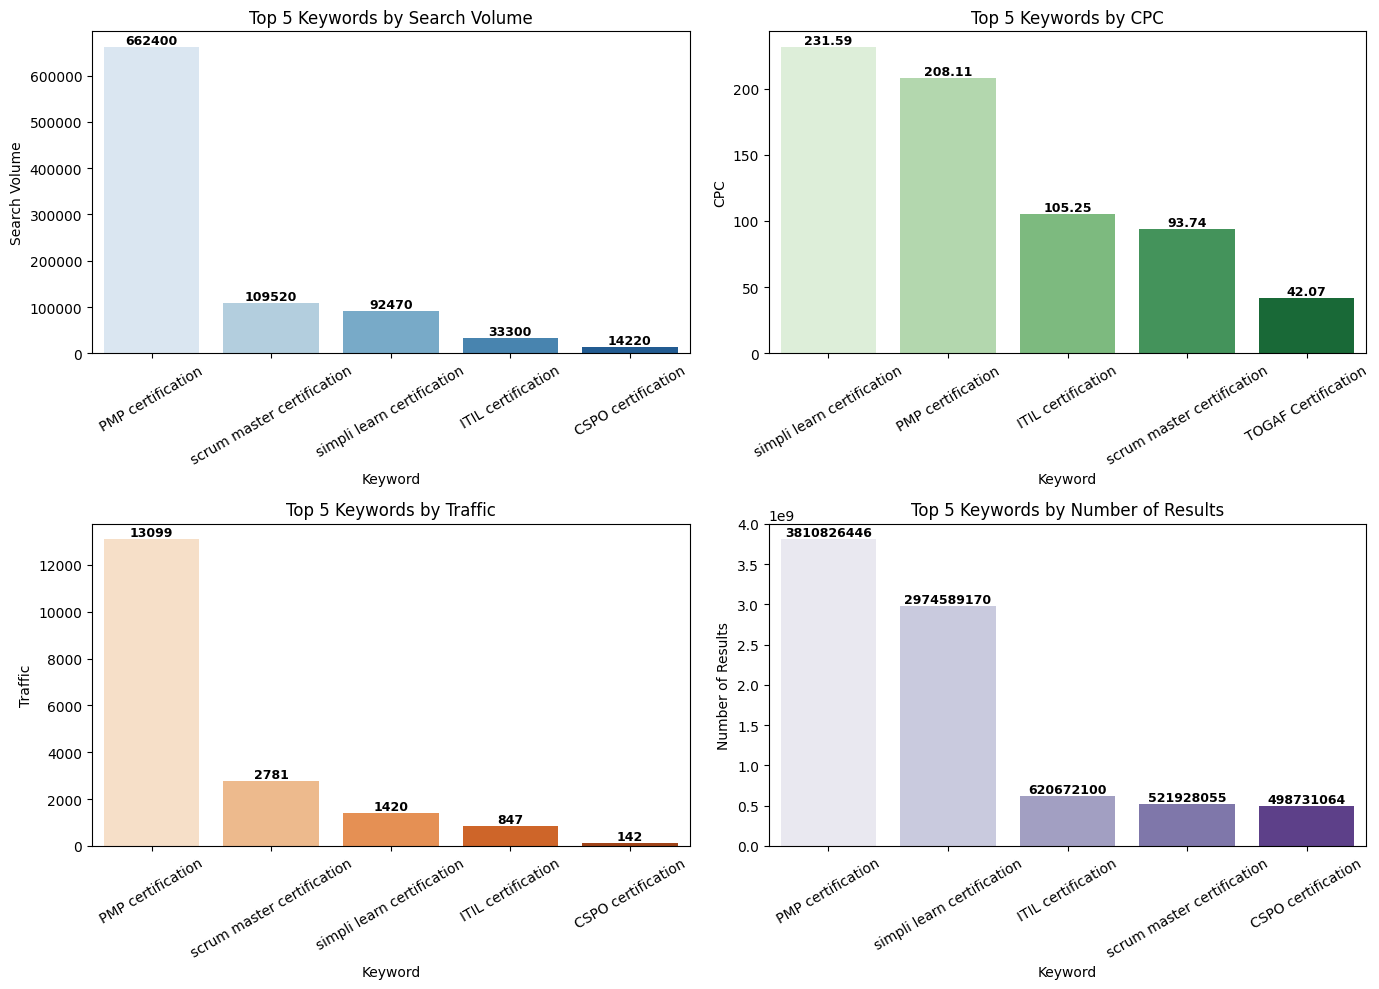

In [23]:
metrics = ['Search Volume', 'CPC', 'Traffic', 'Number of Results']
titles = [
    'Top 5 Keywords by Search Volume',
    'Top 5 Keywords by CPC',
    'Top 5 Keywords by Traffic',
    'Top 5 Keywords by Number of Results'
]

colors = ['Blues', 'Greens', 'Oranges', 'Purples']  # Different palette for each plot

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics):
    grouped_data = (
        df.groupby('Keyword')[metric]
        .sum()
        .reset_index()
        .sort_values(metric, ascending=False)
        .head(5)
    )

    plt.subplot(2, 2, i+1)
    ax = sns.barplot(data=grouped_data, x='Keyword', y=metric, palette=colors[i])
    plt.title(titles[i])
    plt.xlabel('Keyword')
    plt.ylabel(metric)
    plt.xticks(rotation=30)

    # Add values on the bars
    for p in ax.patches:
        value = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            value,
            f"{value:.2f}" if metric == 'CPC' else int(value),  # CPC shows 2 decimals, others as integer
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

plt.tight_layout()
plt.show()


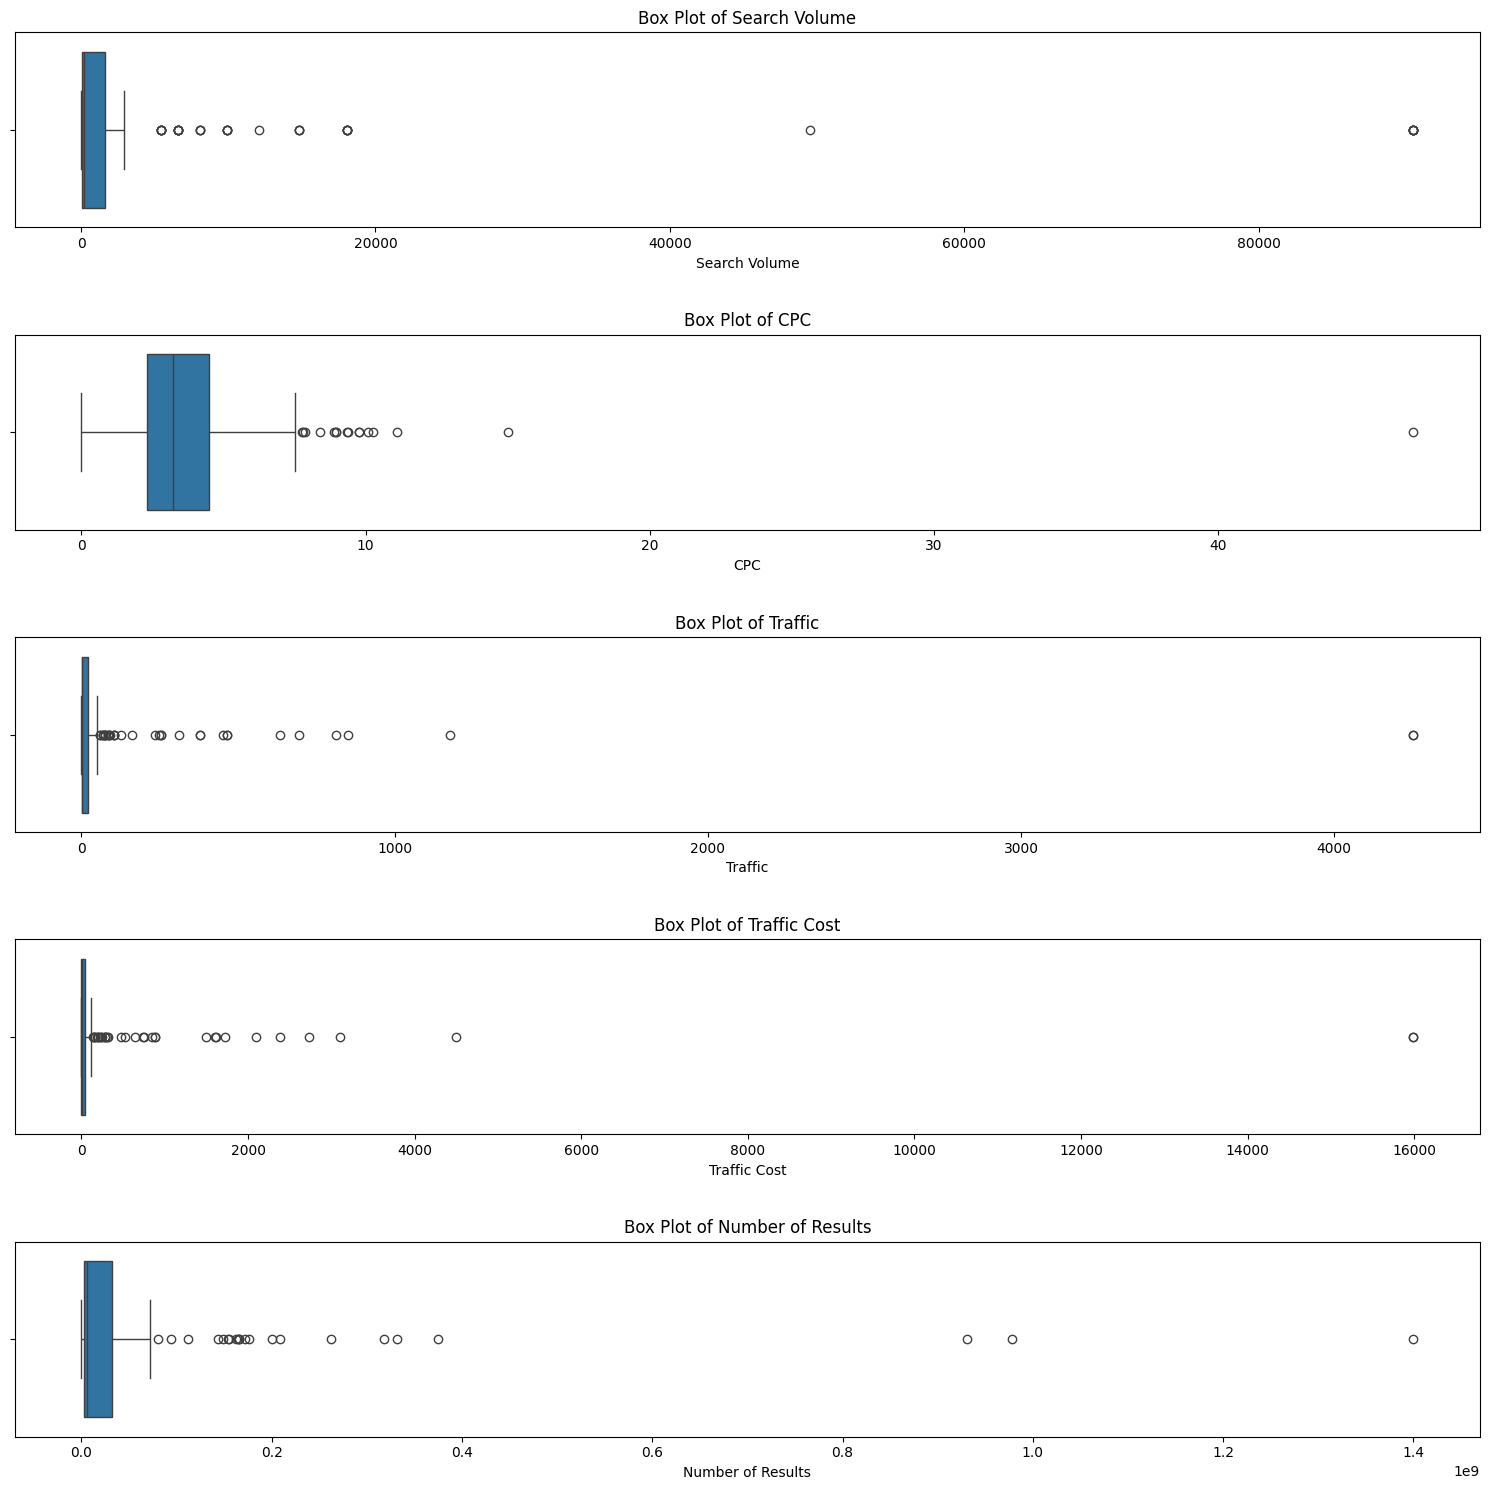

In [17]:
metrics_for_boxplot = ['Search Volume', 'CPC', 'Traffic', 'Traffic Cost', 'Number of Results']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics_for_boxplot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[metric])
    plt.title(f'Box Plot of {metric}')
    plt.xlabel(metric)

plt.tight_layout()
plt.show()

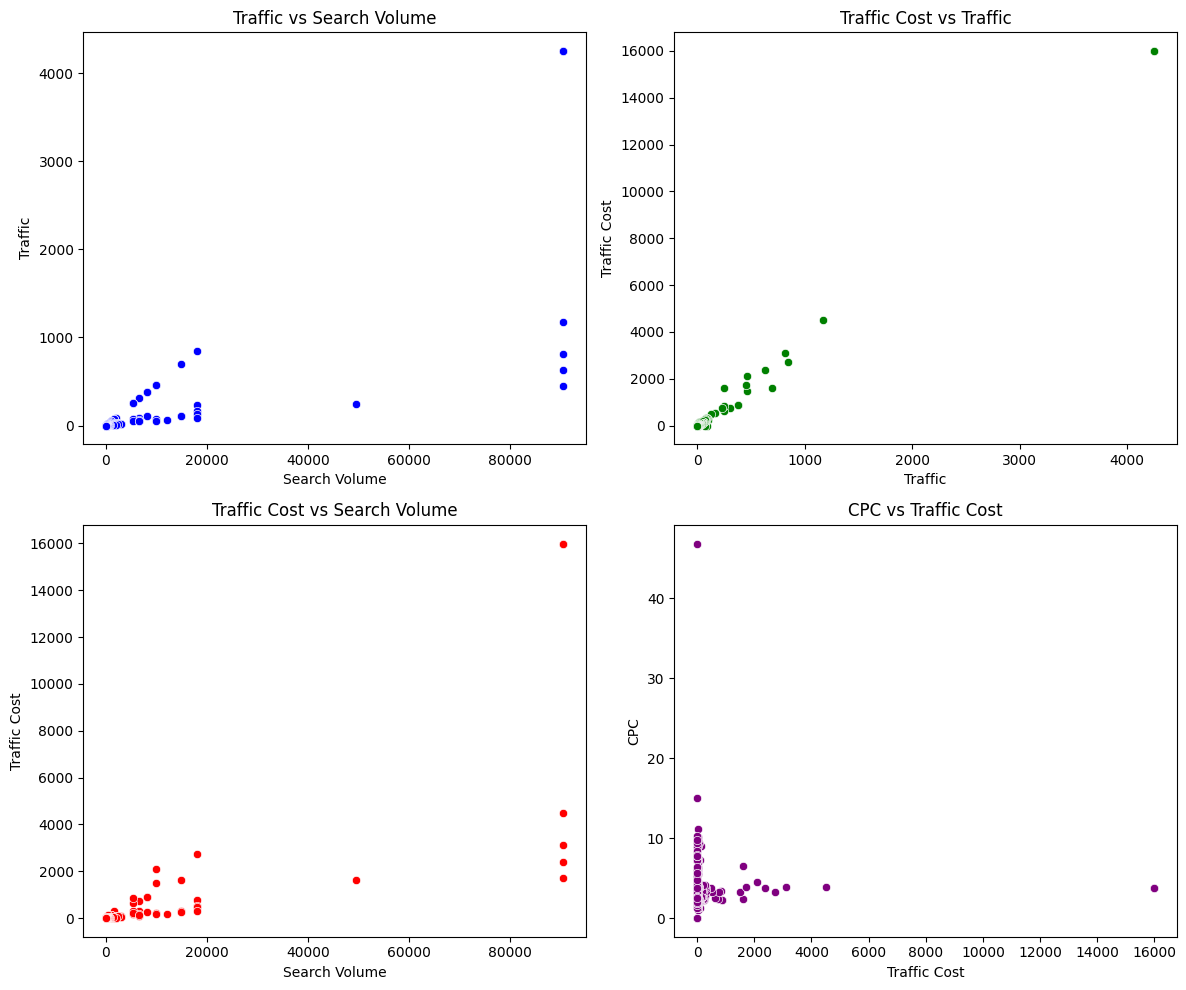

In [31]:
plt.figure(figsize=(12, 10))

# Scatter plot 1: Traffic vs Search Volume
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Search Volume', y='Traffic', color='blue')
plt.title('Traffic vs Search Volume')

# Scatter plot 2: Traffic Cost vs Traffic
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Traffic', y='Traffic Cost', color='green')
plt.title('Traffic Cost vs Traffic')

# Scatter plot 3: Traffic Cost vs Search Volume
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Search Volume', y='Traffic Cost', color='red')
plt.title('Traffic Cost vs Search Volume')

# Scatter plot 4: CPC vs Traffic Cost
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Traffic Cost', y='CPC', color='purple')
plt.title('CPC vs Traffic Cost')

plt.tight_layout()
plt.show()

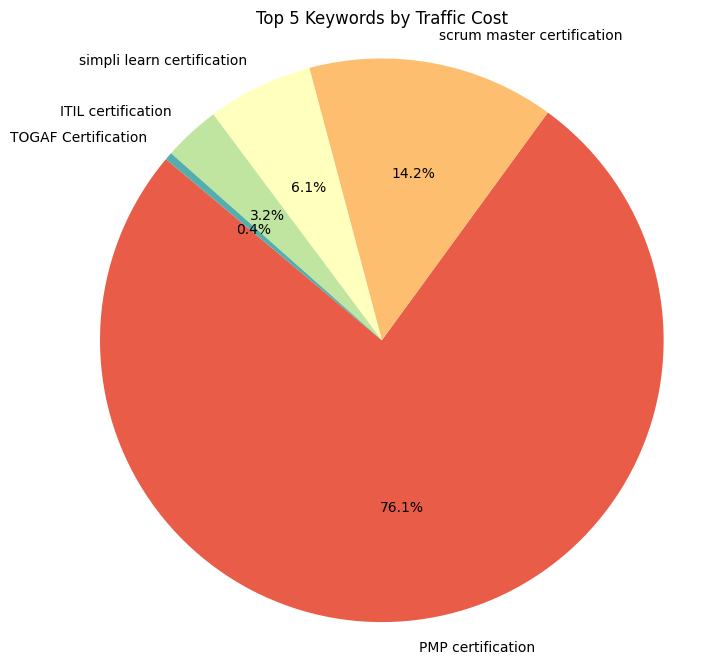

In [40]:
# Group by Keyword and sum the Traffic Cost, then get the top 5
top_keywords_traffic_cost = df.groupby('Keyword')['Traffic Cost'].sum().reset_index().sort_values(by='Traffic Cost', ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_keywords_traffic_cost['Traffic Cost'], labels=top_keywords_traffic_cost['Keyword'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral', len(top_keywords_traffic_cost)))
plt.title('Top 5 Keywords by Traffic Cost')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()